# Neural Network Sample

## Building a neural network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statistics import mean
from typing import Dict, List, Tuple

np.random.seed(7191)

class Neural:

    def __init__(self, layers: List[int], epochs: int,
                 learning_rate: float = 0.001, batch_size: int=32,
                 validation_split: float = 0.2, verbose: int=1):
        self._layer_structure: List[int] = layers
        self._batch_size: int = batch_size
        self._epochs: int = epochs
        self._learning_rate: float = learning_rate
        self._validation_split: float = validation_split
        self._verbose: int = verbose
        self._losses: Dict[str, float] = {"train": [], "validation": []}
        self._is_fit: bool = False
        self.__layers = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        # validation split
        X, X_val, y, y_val = train_test_split(X, y, test_size=self._validation_split, random_state=42)
        # initialization of layers
        self.__layers = self.__init_layers()
        for epoch in range(self._epochs):
            epoch_losses = []
            for i in range(1, len(self.__layers)):
                # forward pass
                x_batch = X[i:(i+self._batch_size)]
                y_batch = y[i:(i+self._batch_size)]
                pred, hidden = self.__forward(x_batch)
                # calculate loss
                loss = self.__calculate_loss(y_batch, pred)
                epoch_losses.append(np.mean(loss ** 2))
                #backward
                self.__backward(hidden, loss)
            valid_preds, _ = self.__forward(X_val)
            train_loss = mean(epoch_losses)
            valid_loss = np.mean(self.__calculate_mse(valid_preds,y_val))
            self._losses["train"].append(train_loss)
            self._losses["validation"].append(valid_loss)
            if self._verbose:
                print(f"Epoch: {epoch} Train MSE: {train_loss} Valid MSE: {valid_loss}")
        self._is_fit = True
        return

    def predict(self, X: np.ndarray) -> np.ndarray:
        if self._is_fit == False:
            raise Exception("Model has not been trained yet.")
        pred, hidden = self.__forward(X)
        return pred

    def plot_learning(self) -> None:
        plt.plot(self._losses["train"],label="loss")
        plt.plot(self._losses["validation"],label="validation")
        plt.legend()

    def __init_layers(self) -> List[np.ndarray]:
        layers = []
        for i in range(1, len(self._layer_structure)):
            layers.append([
                np.random.rand(self._layer_structure[i-1], self._layer_structure[i]) / 5 - .1,
                np.ones((1,self._layer_structure[i]))
            ])
        return layers

    def __forward(self, batch: np.ndarray) -> Tuple[np.ndarray, List[np.ndarray]]:
        hidden = [batch.copy()]
        for i in range(len(self.__layers)):
            batch = np.matmul(batch, self.__layers[i][0]) + self.__layers[i][1]
            if i < len(self.__layers) - 1:
                batch = np.maximum(batch, 0)
            # Store the forward pass hidden values for use in backprop
            hidden.append(batch.copy())
        return batch, hidden

    def __calculate_loss(self,actual: np.ndarray, predicted: np.ndarray) -> np.ndarray:
        "mse"
        return predicted - actual


    def __calculate_mse(self, actual: np.ndarray, predicted: np.ndarray) -> np.ndarray:
        return (actual - predicted) ** 2

    def __backward(self, hidden: List[np.ndarray], grad: np.ndarray) -> None:
        for i in range(len(self.__layers)-1, -1, -1):
            if i != len(self.__layers) - 1:
                grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))

            w_grad = hidden[i].T @ grad
            b_grad = np.mean(grad, axis=0)

            self.__layers[i][0] -= w_grad * self._learning_rate
            self.__layers[i][1] -= b_grad * self._learning_rate

            grad = grad @ self.__layers[i][0].T
        return
#Let’s generate some dummy data to test the Neural.

def generate_data():
    # Define correlation values
    corr_a = 0.8
    corr_b = 0.4
    corr_c = -0.2

    # Generate independent features
    a = np.random.normal(0, 1, size=100000)
    b = np.random.normal(0, 1, size=100000)
    c = np.random.normal(0, 1, size=100000)
    d = np.random.randint(0, 4, size=100000)
    e = np.random.binomial(1, 0.5, size=100000)

    # Generate target feature based on independent features
    target = 50 + corr_a*a + corr_b*b + corr_c*c + d*10 + 20*e + np.random.normal(0, 10, size=100000)

    # Create DataFrame with all features
    df = pd.DataFrame({'a': a, 'b': b, 'c': c, 'd': d, 'e': e, 'target': target})
    return df

## Fitting the model on randomly generated data

Epoch: 0 Train MSE: 5924.858403604577 Valid MSE: 5676.13214068216
Epoch: 1 Train MSE: 5752.809297429296 Valid MSE: 5466.174297190558
Epoch: 2 Train MSE: 5518.380875129211 Valid MSE: 5146.159040174341
Epoch: 3 Train MSE: 5155.119501631794 Valid MSE: 4642.750289036354
Epoch: 4 Train MSE: 4588.047849271647 Valid MSE: 3890.8583091543665
Epoch: 5 Train MSE: 3760.683660893952 Valid MSE: 2893.0895378761807
Epoch: 6 Train MSE: 2704.7305632519065 Valid MSE: 1801.493722335504
Epoch: 7 Train MSE: 1614.6365701485622 Valid MSE: 901.7418057586171
Epoch: 8 Train MSE: 785.0054174030164 Valid MSE: 389.84809112897307
Epoch: 9 Train MSE: 355.2830586580084 Valid MSE: 192.34208391731678
Epoch: 10 Train MSE: 202.5715032090656 Valid MSE: 133.30622206223362
Epoch: 11 Train MSE: 157.6276032292741 Valid MSE: 116.33188376029055
Epoch: 12 Train MSE: 142.44695648286364 Valid MSE: 111.4368697824453
Epoch: 13 Train MSE: 135.57053907720666 Valid MSE: 110.60777592909504
Epoch: 14 Train MSE: 131.81401083031835 Valid MS

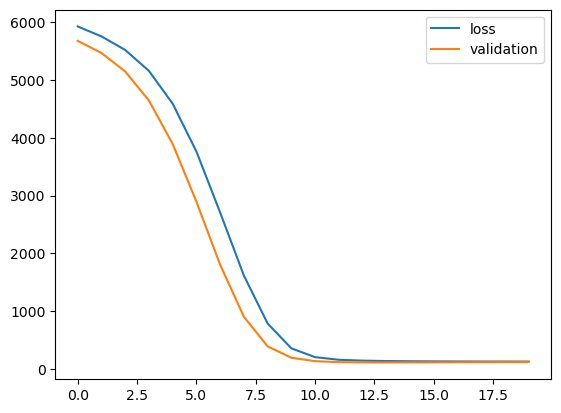

In [2]:
df = generate_data()

# Separate the features and target
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

layer_structure = [X_train.shape[1],10,10,1]
nn = Neural(layer_structure, 20, 1e-5, 64, 0.2, 1)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

### randomly generated data from above

In [3]:
df

,a,b,c,d,e,target
0,-0.336975,1.539382,0.085393,0,0,56.527071
1,0.140006,-0.042273,1.171705,0,1,78.159933
2,-1.035290,1.999564,0.995256,1,0,39.447661
3,-1.523176,-1.089355,1.575096,3,1,108.087030
4,1.190319,0.127029,-0.408177,1,1,68.289088
...,...,...,...,...,...,...
99995,0.594251,-2.039198,-0.767510,1,1,96.780264
99996,-1.563777,-0.350222,1.171843,0,1,56.308916
99997,0.772433,1.445736,-0.183360,0,0,50.282463
99998,-0.113206,-0.230634,-0.483486,3,1,106.890243


## Importing user/manual dataset and preprocessing according to the model

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Assume 'df' is your DataFrame with categorical variables
# Let's say 'categorical_columns' is a list of columns containing categorical data

label_encoder = LabelEncoder()


# Load your dataset
df = pd.read_csv('data.csv')


### Pre-processed data, ready to pass for model fitting.

In [5]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

df = df.drop('id',axis=1)
df =  df.drop('Unnamed: 32',axis=1)

In [7]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Fitting the model on the imported pre-processed dataset

### Feature extraction using correlation analysis against target variable

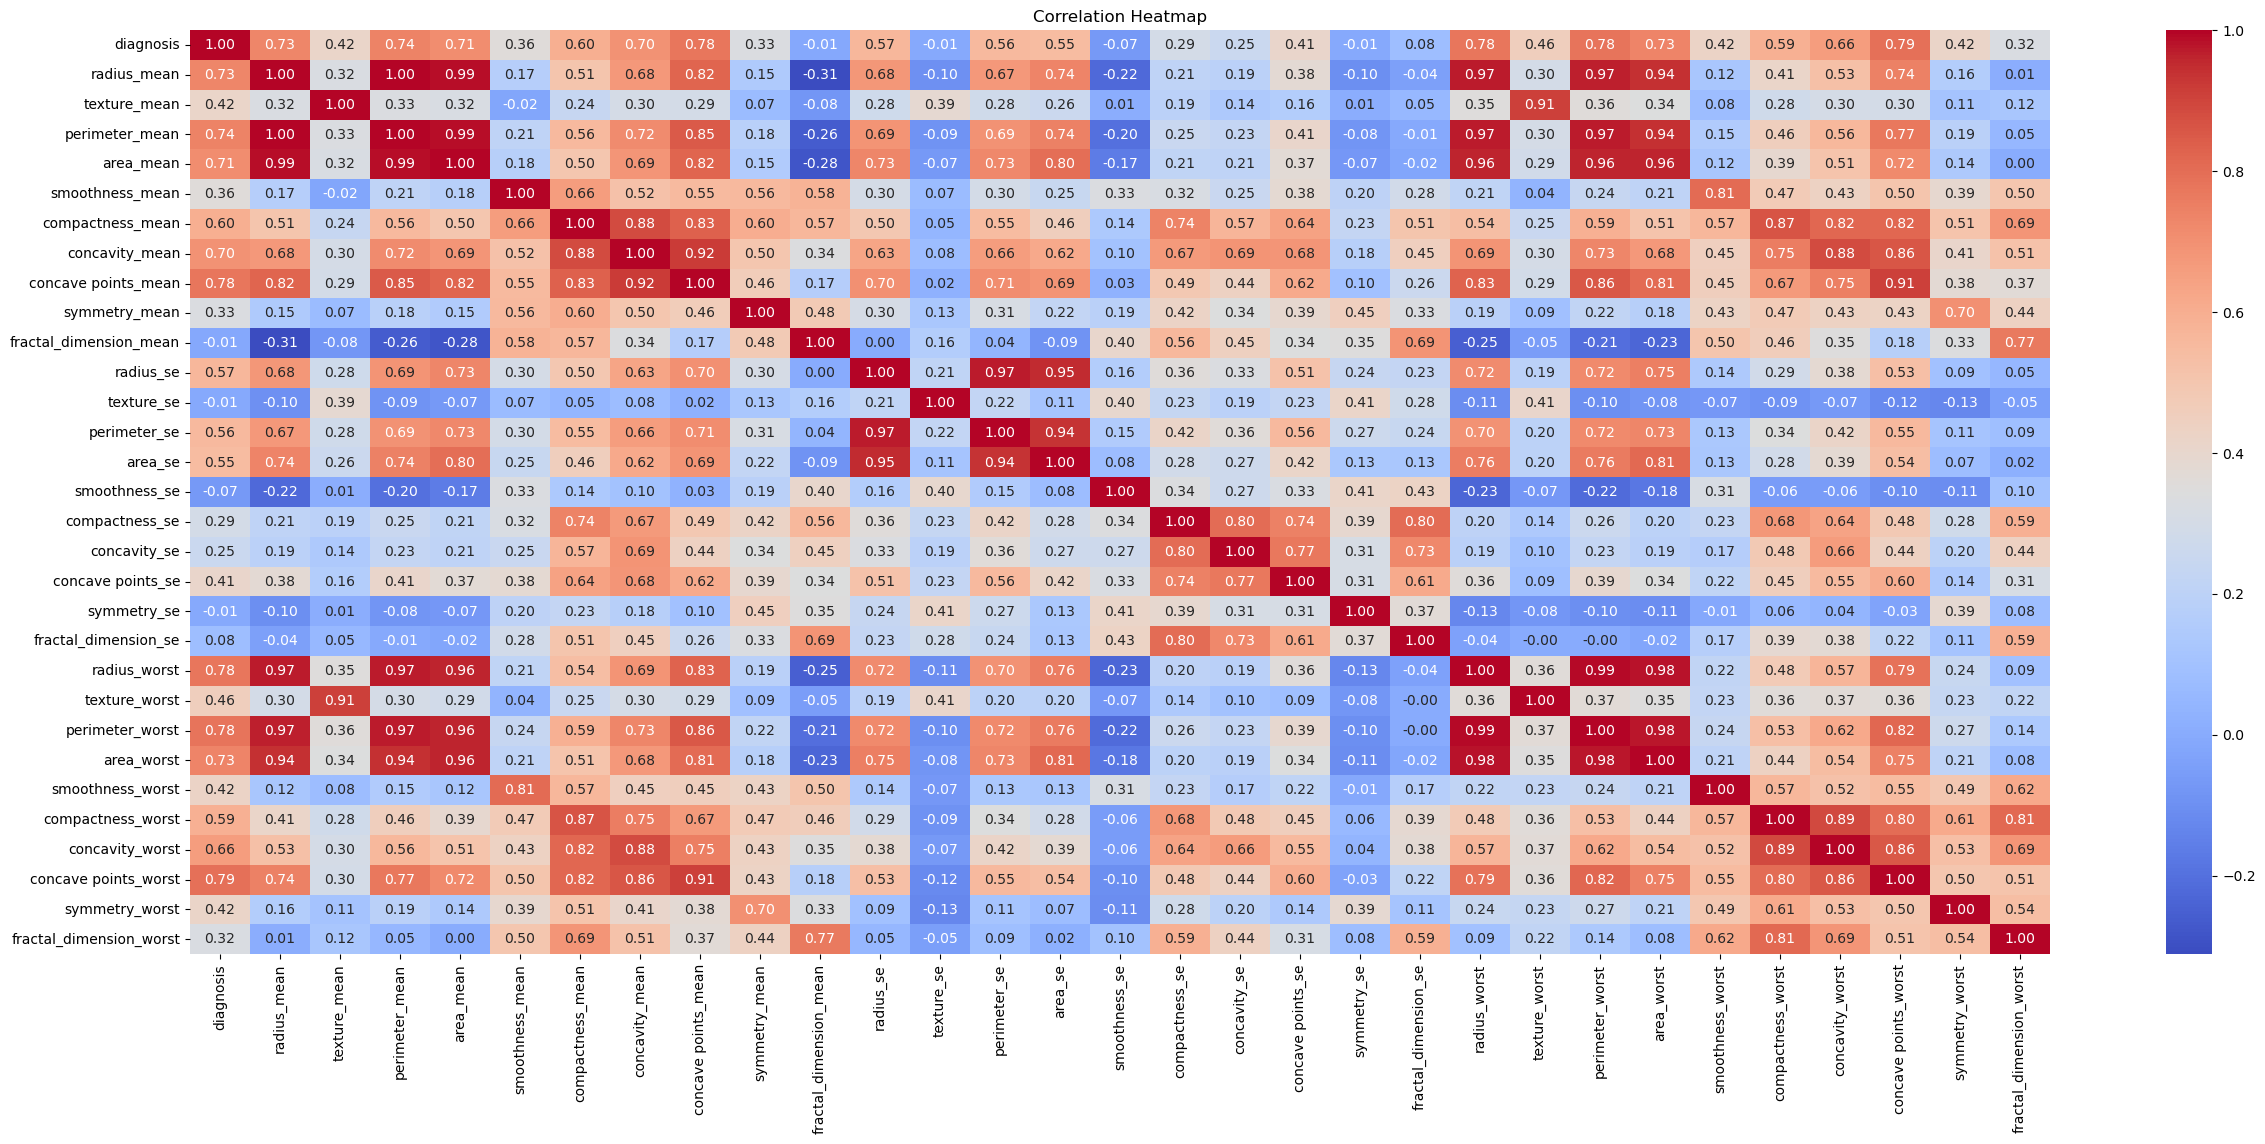

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(30, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### Feature extraction for model fitting

In [9]:
# Separate the features and target
X = df[['radius_mean','perimeter_mean','area_mean','concave points_worst','perimeter_worst','radius_worst','concave points_mean']]
y = df['diagnosis']

In [10]:
X

,radius_mean,perimeter_mean,area_mean,concave points_worst,perimeter_worst,radius_worst,concave points_mean
0,17.99,122.80,1001.0,0.2654,184.60,25.380,0.14710
1,20.57,132.90,1326.0,0.1860,158.80,24.990,0.07017
2,19.69,130.00,1203.0,0.2430,152.50,23.570,0.12790
3,11.42,77.58,386.1,0.2575,98.87,14.910,0.10520
4,20.29,135.10,1297.0,0.1625,152.20,22.540,0.10430
...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.2216,166.10,25.450,0.13890
565,20.13,131.20,1261.0,0.1628,155.00,23.690,0.09791
566,16.60,108.30,858.1,0.1418,126.70,18.980,0.05302
567,20.60,140.10,1265.0,0.2650,184.60,25.740,0.15200


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

### Fitting the Neural network model on the extracted features against the target variable and fine tuning the hyperparameters that will be used to configure the model.

Epoch: 0 Train MSE: 0.398307521831351 Valid MSE: 0.24046590629870926
Epoch: 1 Train MSE: 0.21509665431051372 Valid MSE: 0.24785136211192088
Epoch: 2 Train MSE: 0.2141155054600428 Valid MSE: 0.24853784438476656
Epoch: 3 Train MSE: 0.2141160121577576 Valid MSE: 0.24855003382295934
Epoch: 4 Train MSE: 0.21408586523486525 Valid MSE: 0.24852354677913402
Epoch: 5 Train MSE: 0.21405416177842387 Valid MSE: 0.24849531692159574
Epoch: 6 Train MSE: 0.2140228298069601 Valid MSE: 0.248467412754784
Epoch: 7 Train MSE: 0.2139919578827264 Valid MSE: 0.24843993202318151
Epoch: 8 Train MSE: 0.21396153041381982 Valid MSE: 0.24841286185561282
Epoch: 9 Train MSE: 0.2139315265527555 Valid MSE: 0.24838618369796023
Epoch: 10 Train MSE: 0.2139019257448343 Valid MSE: 0.24835987919985836
Epoch: 11 Train MSE: 0.2138727080075926 Valid MSE: 0.24833393051681882
Epoch: 12 Train MSE: 0.21384385391466715 Valid MSE: 0.24830832029895966
Epoch: 13 Train MSE: 0.2138153445644894 Valid MSE: 0.2482830316633897
Epoch: 14 Train

Epoch: 293 Train MSE: 0.018405158031444734 Valid MSE: 0.05695694570345604
Epoch: 294 Train MSE: 0.018234841861128913 Valid MSE: 0.056904506816178854
Epoch: 295 Train MSE: 0.0181014950520524 Valid MSE: 0.05684265431567733
Epoch: 296 Train MSE: 0.017972869893292477 Valid MSE: 0.056788868987745864
Epoch: 297 Train MSE: 0.017845218550766886 Valid MSE: 0.0567326362365991
Epoch: 298 Train MSE: 0.017719019810519352 Valid MSE: 0.05669383971755842
Epoch: 299 Train MSE: 0.01759398749281949 Valid MSE: 0.0566447383394426
Epoch: 300 Train MSE: 0.01746960416926792 Valid MSE: 0.056596784692935054
Epoch: 301 Train MSE: 0.017346168563394854 Valid MSE: 0.05654999542946452
Epoch: 302 Train MSE: 0.017223639550190593 Valid MSE: 0.0565042917144377
Epoch: 303 Train MSE: 0.017101795725574066 Valid MSE: 0.05645494574124446
Epoch: 304 Train MSE: 0.01698106391223931 Valid MSE: 0.05641050502559435
Epoch: 305 Train MSE: 0.016861099498207997 Valid MSE: 0.05636689158484993
Epoch: 306 Train MSE: 0.01674196092909378 V

Epoch: 586 Train MSE: 0.003307100476365105 Valid MSE: 0.05413821091636833
Epoch: 587 Train MSE: 0.003290222232232155 Valid MSE: 0.05413665289861964
Epoch: 588 Train MSE: 0.0032731773787779976 Valid MSE: 0.054132803123829135
Epoch: 589 Train MSE: 0.003256961994191009 Valid MSE: 0.05413092194238346
Epoch: 590 Train MSE: 0.0032403506465086217 Valid MSE: 0.05412915750669857
Epoch: 591 Train MSE: 0.003223832513260149 Valid MSE: 0.054127386068165015
Epoch: 592 Train MSE: 0.0032069530010671895 Valid MSE: 0.05412326930378779
Epoch: 593 Train MSE: 0.0031912593033180175 Valid MSE: 0.05412119061365783
Epoch: 594 Train MSE: 0.0031750001213921766 Valid MSE: 0.05411925676168742
Epoch: 595 Train MSE: 0.003158831620445306 Valid MSE: 0.05411731719958168
Epoch: 596 Train MSE: 0.0031427553823485553 Valid MSE: 0.054115368018782396
Epoch: 597 Train MSE: 0.003126252443743544 Valid MSE: 0.054111011709709105
Epoch: 598 Train MSE: 0.0031110182304411233 Valid MSE: 0.05410875857718848
Epoch: 599 Train MSE: 0.003

Epoch: 894 Train MSE: 0.0007674630989444342 Valid MSE: 0.05373376584335499
Epoch: 895 Train MSE: 0.0007641075484296986 Valid MSE: 0.053733873172923476
Epoch: 896 Train MSE: 0.0007607904718373648 Valid MSE: 0.053735013793947614
Epoch: 897 Train MSE: 0.0007578702035273915 Valid MSE: 0.05373300166343347
Epoch: 898 Train MSE: 0.0007547645358881903 Valid MSE: 0.0537332220308129
Epoch: 899 Train MSE: 0.0007516417419565213 Valid MSE: 0.0537337306155533
Epoch: 900 Train MSE: 0.0007482752416159947 Valid MSE: 0.0537350351822732
Epoch: 901 Train MSE: 0.000745424987151525 Valid MSE: 0.053736104235557865
Epoch: 902 Train MSE: 0.0007424891255137396 Valid MSE: 0.05373638361927385
Epoch: 903 Train MSE: 0.0007394209073371676 Valid MSE: 0.0537364445622977
Epoch: 904 Train MSE: 0.0007363241932417616 Valid MSE: 0.05373572109714946
Epoch: 905 Train MSE: 0.0007331837772805717 Valid MSE: 0.05373612597623825
Epoch: 906 Train MSE: 0.0007303332648792183 Valid MSE: 0.053736598505388124
Epoch: 907 Train MSE: 0.00

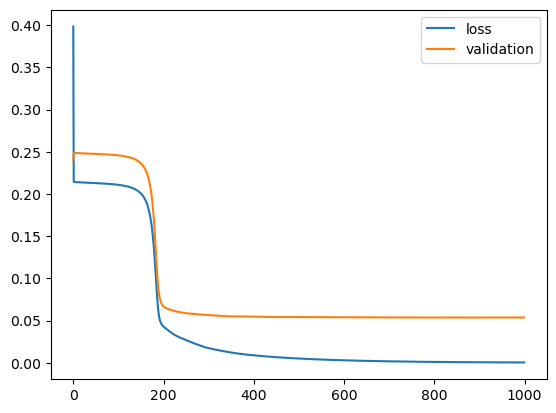

In [332]:
#low learning rate


scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 1000
learn_rate = .0021
batch_size = 30
val_split = .2
verbose = 1

layer_structure = [X_train.shape[1],10,20,10,5,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.3943402398897153 Valid MSE: 0.24065481199311578
Epoch: 1 Train MSE: 0.21403146563630254 Valid MSE: 0.24755443689367487
Epoch: 2 Train MSE: 0.21356345262907578 Valid MSE: 0.24801031102172225
Epoch: 3 Train MSE: 0.2135790034360914 Valid MSE: 0.24802385233696478
Epoch: 4 Train MSE: 0.2135718649668998 Valid MSE: 0.24801744630323982
Epoch: 5 Train MSE: 0.21356364090613633 Valid MSE: 0.24801016586147648
Epoch: 6 Train MSE: 0.21355538125499807 Valid MSE: 0.2480028555435385
Epoch: 7 Train MSE: 0.2135471297770613 Valid MSE: 0.2479955501883531
Epoch: 8 Train MSE: 0.2135388853952843 Valid MSE: 0.2479882486754575
Epoch: 9 Train MSE: 0.2135306450401081 Valid MSE: 0.24798094828380293
Epoch: 10 Train MSE: 0.21352240554984744 Valid MSE: 0.247973646216175
Epoch: 11 Train MSE: 0.21351416375254262 Valid MSE: 0.24796633966467055
Epoch: 12 Train MSE: 0.2135059164670042 Valid MSE: 0.2479590258112977
Epoch: 13 Train MSE: 0.21349766050024963 Valid MSE: 0.2479517018256712
Epoch: 14 Train 

Epoch: 290 Train MSE: 0.022195023089849192 Valid MSE: 0.05821174226310287
Epoch: 291 Train MSE: 0.02204753023170361 Valid MSE: 0.058204646234044075
Epoch: 292 Train MSE: 0.02190269630030756 Valid MSE: 0.05819870011442214
Epoch: 293 Train MSE: 0.021760469655702403 Valid MSE: 0.05819382947978223
Epoch: 294 Train MSE: 0.021618871036499038 Valid MSE: 0.058190304619589565
Epoch: 295 Train MSE: 0.02147717725811897 Valid MSE: 0.058188019947594684
Epoch: 296 Train MSE: 0.02133795129727845 Valid MSE: 0.0581867600411105
Epoch: 297 Train MSE: 0.021201194430211977 Valid MSE: 0.05818157982288206
Epoch: 298 Train MSE: 0.021062046074275996 Valid MSE: 0.05816891207940225
Epoch: 299 Train MSE: 0.020928952515423316 Valid MSE: 0.05815514735896474
Epoch: 300 Train MSE: 0.02080272354564514 Valid MSE: 0.058141558809262917
Epoch: 301 Train MSE: 0.020678901979013165 Valid MSE: 0.058128684752633095
Epoch: 302 Train MSE: 0.020557418709110674 Valid MSE: 0.0581165634272818
Epoch: 303 Train MSE: 0.0204491508847383

Epoch: 585 Train MSE: 0.010677388520409937 Valid MSE: 0.05512970815798941
Epoch: 586 Train MSE: 0.010657028832859232 Valid MSE: 0.055121833563835314
Epoch: 587 Train MSE: 0.010636733062534553 Valid MSE: 0.05511404482027304
Epoch: 588 Train MSE: 0.010616501393829952 Valid MSE: 0.05510633888019393
Epoch: 589 Train MSE: 0.010596360677368266 Valid MSE: 0.05513389109906572
Epoch: 590 Train MSE: 0.010574941231007374 Valid MSE: 0.05509115803887669
Epoch: 591 Train MSE: 0.010556191945865132 Valid MSE: 0.05511107216159949
Epoch: 592 Train MSE: 0.010535239613066634 Valid MSE: 0.05511086371531229
Epoch: 593 Train MSE: 0.010515060580226318 Valid MSE: 0.05506879141184146
Epoch: 594 Train MSE: 0.01049650758503787 Valid MSE: 0.05512290963129865
Epoch: 595 Train MSE: 0.010474577660286094 Valid MSE: 0.055054174333112375
Epoch: 596 Train MSE: 0.010457040352867038 Valid MSE: 0.055107707797615965
Epoch: 597 Train MSE: 0.010435276162364115 Valid MSE: 0.05506644907774923
Epoch: 598 Train MSE: 0.010416877437

Epoch: 880 Train MSE: 0.00660649362631829 Valid MSE: 0.054348597754423106
Epoch: 881 Train MSE: 0.006597818449353897 Valid MSE: 0.054341082536482795
Epoch: 882 Train MSE: 0.006589118882175837 Valid MSE: 0.05433784148750376
Epoch: 883 Train MSE: 0.006580617342439388 Valid MSE: 0.05433455323880281
Epoch: 884 Train MSE: 0.006572013646712146 Valid MSE: 0.054332130723346396
Epoch: 885 Train MSE: 0.006563460790168742 Valid MSE: 0.05432487027891925
Epoch: 886 Train MSE: 0.006554852214977853 Valid MSE: 0.05432182081279878
Epoch: 887 Train MSE: 0.006546443677333068 Valid MSE: 0.05431872543459952
Epoch: 888 Train MSE: 0.006537945224339069 Valid MSE: 0.05431207259785912
Epoch: 889 Train MSE: 0.0065294328496989604 Valid MSE: 0.05430917889273113
Epoch: 890 Train MSE: 0.006521101151842667 Valid MSE: 0.05430623542312872
Epoch: 891 Train MSE: 0.006512670561403353 Valid MSE: 0.05429975185144115
Epoch: 892 Train MSE: 0.006504241159611936 Valid MSE: 0.054297003597479424
Epoch: 893 Train MSE: 0.0064959808

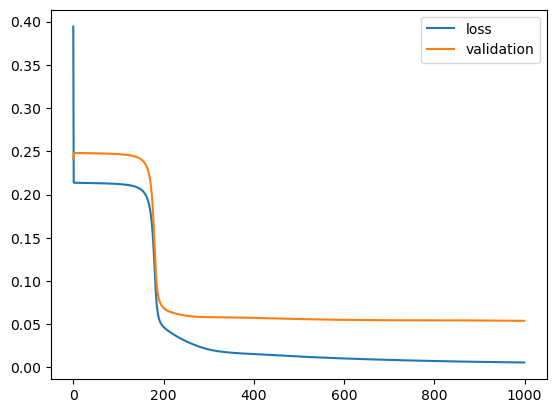

In [338]:
#medium learning rate


scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 1000
learn_rate = .0024
batch_size = 30
val_split = .2
verbose = 1

layer_structure = [X_train.shape[1],10,20,10,5,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.2776681703450626 Valid MSE: 0.24523899836936847
Epoch: 1 Train MSE: 0.2131822491165064 Valid MSE: 0.2478235564572609
Epoch: 2 Train MSE: 0.21327578479070408 Valid MSE: 0.24787211195801787
Epoch: 3 Train MSE: 0.21326885298837073 Valid MSE: 0.24786367416970312
Epoch: 4 Train MSE: 0.21325834204518773 Valid MSE: 0.24785396016093456
Epoch: 5 Train MSE: 0.21324762248795717 Valid MSE: 0.24784409399790094
Epoch: 6 Train MSE: 0.21323675659146724 Valid MSE: 0.24783409240961857
Epoch: 7 Train MSE: 0.21322573889633978 Valid MSE: 0.2478239495272965
Epoch: 8 Train MSE: 0.21321456237139277 Valid MSE: 0.24781365883604894
Epoch: 9 Train MSE: 0.21320321974248518 Valid MSE: 0.24780321360935298
Epoch: 10 Train MSE: 0.21319170350811797 Valid MSE: 0.24779260690722685
Epoch: 11 Train MSE: 0.2131800059278753 Valid MSE: 0.24778183156503153
Epoch: 12 Train MSE: 0.2131681190097128 Valid MSE: 0.247770880181506
Epoch: 13 Train MSE: 0.2131560344965805 Valid MSE: 0.2477597451061756
Epoch: 14 Tr

Epoch: 300 Train MSE: 0.01584233155491377 Valid MSE: 0.057878337066098455
Epoch: 301 Train MSE: 0.015812892667765848 Valid MSE: 0.05786764367332289
Epoch: 302 Train MSE: 0.01578393475030292 Valid MSE: 0.05785668774466925
Epoch: 303 Train MSE: 0.01575544190967318 Valid MSE: 0.05784547474061636
Epoch: 304 Train MSE: 0.015727398829818568 Valid MSE: 0.05783401036592295
Epoch: 305 Train MSE: 0.015699790756974065 Valid MSE: 0.0578223005439575
Epoch: 306 Train MSE: 0.01567260348487862 Valid MSE: 0.057810351392012294
Epoch: 307 Train MSE: 0.015645810755604974 Valid MSE: 0.05779816376799956
Epoch: 308 Train MSE: 0.015619445139918288 Valid MSE: 0.057785759918221914
Epoch: 309 Train MSE: 0.015593460156335325 Valid MSE: 0.05777315241917868
Epoch: 310 Train MSE: 0.01556784396237319 Valid MSE: 0.057760476254853726
Epoch: 311 Train MSE: 0.015542584901539088 Valid MSE: 0.057747587374788016
Epoch: 312 Train MSE: 0.015517671760779974 Valid MSE: 0.05773449082793656
Epoch: 313 Train MSE: 0.015493093761718

Epoch: 597 Train MSE: 0.008397108781981693 Valid MSE: 0.05513362434578849
Epoch: 598 Train MSE: 0.008381827568437583 Valid MSE: 0.05513272966517983
Epoch: 599 Train MSE: 0.008366583234178738 Valid MSE: 0.05513189265281281
Epoch: 600 Train MSE: 0.008351375658977011 Valid MSE: 0.055131112826925864
Epoch: 601 Train MSE: 0.008336204723817934 Valid MSE: 0.055130389712009335
Epoch: 602 Train MSE: 0.008321070310871814 Valid MSE: 0.05512972283884711
Epoch: 603 Train MSE: 0.00830597230346547 Valid MSE: 0.05512911174452561
Epoch: 604 Train MSE: 0.00829091058605458 Valid MSE: 0.055128555972416705
Epoch: 605 Train MSE: 0.008275885044196794 Valid MSE: 0.05512805507213941
Epoch: 606 Train MSE: 0.00826089556452548 Valid MSE: 0.05512760859950422
Epoch: 607 Train MSE: 0.008245942034724304 Valid MSE: 0.05512722157822142
Epoch: 608 Train MSE: 0.008231024343502502 Valid MSE: 0.05512688858251255
Epoch: 609 Train MSE: 0.00821614238057089 Valid MSE: 0.05512660866531313
Epoch: 610 Train MSE: 0.008201296036618

Epoch: 892 Train MSE: 0.005401020482931869 Valid MSE: 0.05454578743689845
Epoch: 893 Train MSE: 0.005394185738913988 Valid MSE: 0.054542165900018605
Epoch: 894 Train MSE: 0.005387336812965865 Valid MSE: 0.05454110538053011
Epoch: 895 Train MSE: 0.005380582668164481 Valid MSE: 0.054537601630730626
Epoch: 896 Train MSE: 0.005373802217750014 Valid MSE: 0.05453407207911243
Epoch: 897 Train MSE: 0.005367038868871598 Valid MSE: 0.054530587470553456
Epoch: 898 Train MSE: 0.005360293775087968 Valid MSE: 0.05452714709707188
Epoch: 899 Train MSE: 0.005353580600642372 Valid MSE: 0.054531864385412424
Epoch: 900 Train MSE: 0.005347022267719017 Valid MSE: 0.054520616658264666
Epoch: 901 Train MSE: 0.005340181712036803 Valid MSE: 0.05451726980195627
Epoch: 902 Train MSE: 0.0053335074962034806 Valid MSE: 0.054513990862781386
Epoch: 903 Train MSE: 0.0053268513268226875 Valid MSE: 0.05451075215205406
Epoch: 904 Train MSE: 0.005320212562660906 Valid MSE: 0.054507552718182625
Epoch: 905 Train MSE: 0.00531

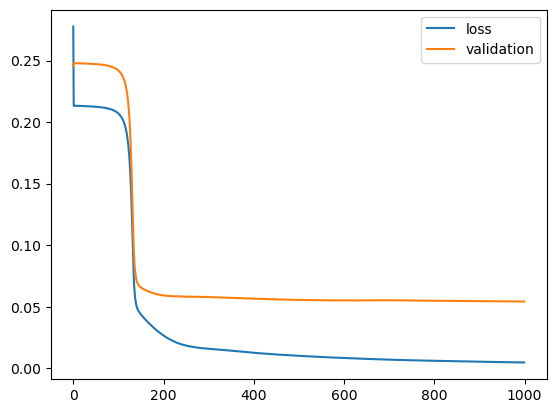

In [344]:
#high learning rate


scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 1000
learn_rate = .00275
batch_size = 30
val_split = .2
verbose = 1

layer_structure = [X_train.shape[1],10,20,10,5,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

# Epoch

Epoch: 0 Train MSE: 0.2558397749059404 Valid MSE: 0.24619989437102419
Epoch: 1 Train MSE: 0.2132894039820533 Valid MSE: 0.24794297394044015
Epoch: 2 Train MSE: 0.21336252674088996 Valid MSE: 0.24796274884973288
Epoch: 3 Train MSE: 0.21335098179652434 Valid MSE: 0.24795160838074223
Epoch: 4 Train MSE: 0.21333741375035786 Valid MSE: 0.24793984867763577
Epoch: 5 Train MSE: 0.2133236918233114 Valid MSE: 0.24792796923356186
Epoch: 6 Train MSE: 0.21330983861298797 Valid MSE: 0.2479159706366615
Epoch: 7 Train MSE: 0.21329584552545616 Valid MSE: 0.24790384497922785
Epoch: 8 Train MSE: 0.21328170325909512 Valid MSE: 0.24789158403891412
Epoch: 9 Train MSE: 0.21326740230053476 Valid MSE: 0.247879179403191
Epoch: 10 Train MSE: 0.21325293291904326 Valid MSE: 0.2478666224588513
Epoch: 11 Train MSE: 0.21323828515200066 Valid MSE: 0.24785390437875643
Epoch: 12 Train MSE: 0.21322344878964106 Valid MSE: 0.24784101610799011
Epoch: 13 Train MSE: 0.21320841335915516 Valid MSE: 0.2478279483494147
Epoch: 14 

Epoch: 300 Train MSE: 0.018750748644739523 Valid MSE: 0.05976035513273382
Epoch: 301 Train MSE: 0.01871100872613217 Valid MSE: 0.05974475190877085
Epoch: 302 Train MSE: 0.018663018208561893 Valid MSE: 0.05972195889596336
Epoch: 303 Train MSE: 0.018633807699172313 Valid MSE: 0.05970627279155609
Epoch: 304 Train MSE: 0.018586765077320162 Valid MSE: 0.05968309013595897
Epoch: 305 Train MSE: 0.01855840655709235 Valid MSE: 0.059666512011678045
Epoch: 306 Train MSE: 0.018512410380590694 Valid MSE: 0.05964272811792041
Epoch: 307 Train MSE: 0.018475536094800217 Valid MSE: 0.05961922919489286
Epoch: 308 Train MSE: 0.018448561018925183 Valid MSE: 0.0596026556790694
Epoch: 309 Train MSE: 0.018403732779067428 Valid MSE: 0.05957813610261752
Epoch: 310 Train MSE: 0.0183681619788362 Valid MSE: 0.05955430518624566
Epoch: 311 Train MSE: 0.01834211552657201 Valid MSE: 0.05953809778807238
Epoch: 312 Train MSE: 0.018298691434129467 Valid MSE: 0.05951329812449893
Epoch: 313 Train MSE: 0.018264252347498663 

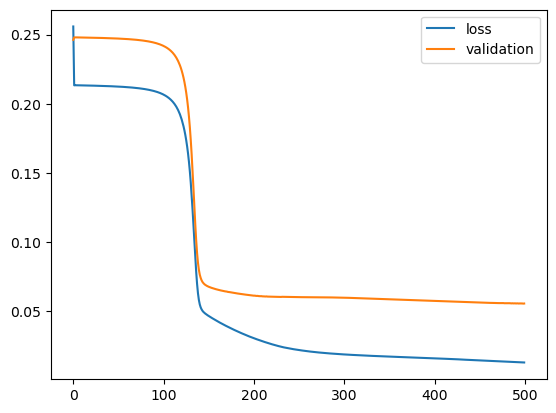

In [348]:
#epoch


scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 500
learn_rate = .0028
batch_size = 30
val_split = .2
verbose = 1

layer_structure = [X_train.shape[1],10,20,10,5,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.5009289840284596 Valid MSE: 0.2417140717546751
Epoch: 1 Train MSE: 0.21355007296989315 Valid MSE: 0.24792967805522165
Epoch: 2 Train MSE: 0.2134654065650743 Valid MSE: 0.24806508856480744
Epoch: 3 Train MSE: 0.21345357747551058 Valid MSE: 0.2480500382722502
Epoch: 4 Train MSE: 0.21343256087137286 Valid MSE: 0.24803225068431192
Epoch: 5 Train MSE: 0.2134113142449736 Valid MSE: 0.2480143493187703
Epoch: 6 Train MSE: 0.2133899822470235 Valid MSE: 0.24799636454959084
Epoch: 7 Train MSE: 0.21336854908262431 Valid MSE: 0.24797828078872292
Epoch: 8 Train MSE: 0.2133469959591623 Valid MSE: 0.2479600814775029
Epoch: 9 Train MSE: 0.2133253038348849 Valid MSE: 0.2479417498444934
Epoch: 10 Train MSE: 0.2133034534298733 Valid MSE: 0.24792326888507535
Epoch: 11 Train MSE: 0.21328142518806814 Valid MSE: 0.24790462132662883
Epoch: 12 Train MSE: 0.21325919923749462 Valid MSE: 0.24788578959252372
Epoch: 13 Train MSE: 0.21323675534935865 Valid MSE: 0.24786675576500744
Epoch: 14 Trai

Epoch: 313 Train MSE: 0.018651339027818625 Valid MSE: 0.06010973217584546
Epoch: 314 Train MSE: 0.01862354305280833 Valid MSE: 0.060166439462085226
Epoch: 315 Train MSE: 0.018583093398945153 Valid MSE: 0.06012694218364264
Epoch: 316 Train MSE: 0.018548679014459325 Valid MSE: 0.05999185827659452
Epoch: 317 Train MSE: 0.018521815279948593 Valid MSE: 0.06004820592250275
Epoch: 318 Train MSE: 0.01848266208036596 Valid MSE: 0.06000840353111746
Epoch: 319 Train MSE: 0.01845073085030689 Valid MSE: 0.05986982426623479
Epoch: 320 Train MSE: 0.018424431040185096 Valid MSE: 0.05992624925863053
Epoch: 321 Train MSE: 0.01838682424932516 Valid MSE: 0.05978788881435608
Epoch: 322 Train MSE: 0.01836123715905647 Valid MSE: 0.059843873340668256
Epoch: 323 Train MSE: 0.018323888990742537 Valid MSE: 0.05970843655419201
Epoch: 324 Train MSE: 0.01829859987090853 Valid MSE: 0.05976432274807446
Epoch: 325 Train MSE: 0.018261585983496843 Valid MSE: 0.059629579011892565
Epoch: 326 Train MSE: 0.01823669242754638

Epoch: 615 Train MSE: 0.010679542390423657 Valid MSE: 0.054116702737032236
Epoch: 616 Train MSE: 0.010659363971812929 Valid MSE: 0.05410995427655373
Epoch: 617 Train MSE: 0.010639255222584404 Valid MSE: 0.05410408344094401
Epoch: 618 Train MSE: 0.010619097538581373 Valid MSE: 0.05409685794790004
Epoch: 619 Train MSE: 0.010599260631753519 Valid MSE: 0.05409040687820462
Epoch: 620 Train MSE: 0.010579241678367594 Valid MSE: 0.05408327469363873
Epoch: 621 Train MSE: 0.010559163300810213 Valid MSE: 0.05407596221059099
Epoch: 622 Train MSE: 0.01053940275533132 Valid MSE: 0.0540691768994077
Epoch: 623 Train MSE: 0.010519574645459356 Valid MSE: 0.05406208117929981
Epoch: 624 Train MSE: 0.010499751584750009 Valid MSE: 0.05405473445523312
Epoch: 625 Train MSE: 0.010480051409597065 Valid MSE: 0.05404758968667
Epoch: 626 Train MSE: 0.01046043156930323 Valid MSE: 0.05404064175971137
Epoch: 627 Train MSE: 0.010440704651514502 Valid MSE: 0.05403319396941617
Epoch: 628 Train MSE: 0.010421167423990726 

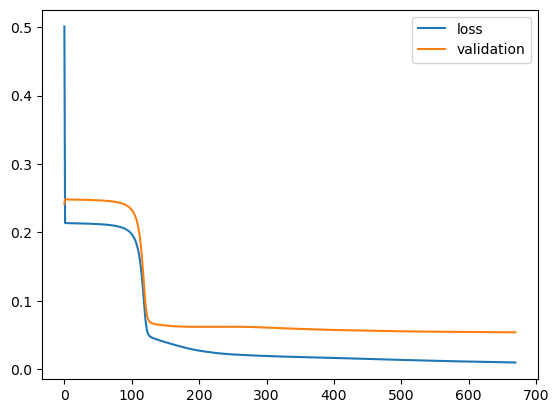

In [352]:
#epoch


scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 670
learn_rate = .0028
batch_size = 30
val_split = .2
verbose = 1

layer_structure = [X_train.shape[1],10,20,10,5,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.3747205680762942 Valid MSE: 0.2436091437066931
Epoch: 1 Train MSE: 0.21321874711870592 Valid MSE: 0.2477986983403728
Epoch: 2 Train MSE: 0.213283440235916 Valid MSE: 0.2478810153181513
Epoch: 3 Train MSE: 0.21326406714782814 Valid MSE: 0.24786094601774494
Epoch: 4 Train MSE: 0.21323840833069216 Valid MSE: 0.2478386070717206
Epoch: 5 Train MSE: 0.21321244588309243 Valid MSE: 0.24781606044808988
Epoch: 6 Train MSE: 0.21318627706567195 Valid MSE: 0.2477933229158289
Epoch: 7 Train MSE: 0.21315987437369466 Valid MSE: 0.2477703682676948
Epoch: 8 Train MSE: 0.2131332071095373 Valid MSE: 0.24774716882141043
Epoch: 9 Train MSE: 0.21310624382616583 Valid MSE: 0.24772369620541992
Epoch: 10 Train MSE: 0.21307895229298995 Valid MSE: 0.24769992129664495
Epoch: 11 Train MSE: 0.213051299406546 Valid MSE: 0.24767581413696388
Epoch: 12 Train MSE: 0.2130232510957923 Valid MSE: 0.2476513438450981
Epoch: 13 Train MSE: 0.21299477222253702 Valid MSE: 0.2476264785237617
Epoch: 14 Train M

Epoch: 292 Train MSE: 0.018153298715636618 Valid MSE: 0.0603732942927569
Epoch: 293 Train MSE: 0.01812237370683775 Valid MSE: 0.06034689469743201
Epoch: 294 Train MSE: 0.018091678798184775 Valid MSE: 0.060311209879470785
Epoch: 295 Train MSE: 0.018061435580139673 Valid MSE: 0.06027409392091511
Epoch: 296 Train MSE: 0.018031568485284786 Valid MSE: 0.060313648182517055
Epoch: 297 Train MSE: 0.01800667773811658 Valid MSE: 0.06030241251960279
Epoch: 298 Train MSE: 0.01797690317982977 Valid MSE: 0.06026683579455826
Epoch: 299 Train MSE: 0.01794117352249293 Valid MSE: 0.06017033736432516
Epoch: 300 Train MSE: 0.017912029534217687 Valid MSE: 0.060205565130905685
Epoch: 301 Train MSE: 0.01788856173969202 Valid MSE: 0.060180604310402876
Epoch: 302 Train MSE: 0.017859498009966234 Valid MSE: 0.060151461504116537
Epoch: 303 Train MSE: 0.017830589803542508 Valid MSE: 0.060129060068237754
Epoch: 304 Train MSE: 0.017796297416152122 Valid MSE: 0.06002690140337318
Epoch: 305 Train MSE: 0.01776748213648

Epoch: 587 Train MSE: 0.01058757874354176 Valid MSE: 0.05529009121291631
Epoch: 588 Train MSE: 0.010567695772981976 Valid MSE: 0.0552839903768011
Epoch: 589 Train MSE: 0.010547218266827679 Valid MSE: 0.05527235681464351
Epoch: 590 Train MSE: 0.010523370961446465 Valid MSE: 0.05525625602139862
Epoch: 591 Train MSE: 0.01050635485545864 Valid MSE: 0.05525548147412795
Epoch: 592 Train MSE: 0.01048693566474218 Valid MSE: 0.05525634815186945
Epoch: 593 Train MSE: 0.010466982854647804 Valid MSE: 0.055245139927955135
Epoch: 594 Train MSE: 0.010447164091000102 Valid MSE: 0.05524449591927274
Epoch: 595 Train MSE: 0.010427341559342985 Valid MSE: 0.05523397551245241
Epoch: 596 Train MSE: 0.010407635739395722 Valid MSE: 0.05523185186643516
Epoch: 597 Train MSE: 0.0103877887920549 Valid MSE: 0.05522008216922127
Epoch: 598 Train MSE: 0.010368119076039 Valid MSE: 0.055218920942010405
Epoch: 599 Train MSE: 0.010348476373172811 Valid MSE: 0.05520732264413021
Epoch: 600 Train MSE: 0.010328869473813045 Va

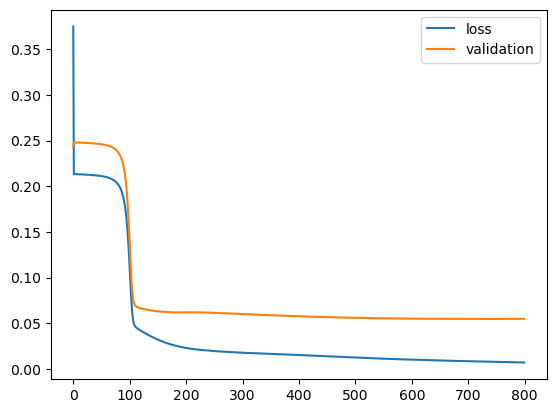

In [357]:
#epoch


scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 800
learn_rate = .0028
batch_size = 30
val_split = .2
verbose = 1

layer_structure = [X_train.shape[1],10,20,10,5,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

# Batch

Epoch: 0 Train MSE: 0.3558917140352609 Valid MSE: 0.2398690221262843
Epoch: 1 Train MSE: 0.22409895410441863 Valid MSE: 0.2424926156845388
Epoch: 2 Train MSE: 0.22371862500096085 Valid MSE: 0.24259660847538533
Epoch: 3 Train MSE: 0.22368964754458076 Valid MSE: 0.2425727713355999
Epoch: 4 Train MSE: 0.22366108816081273 Valid MSE: 0.24254446787265282
Epoch: 5 Train MSE: 0.22363248944123956 Valid MSE: 0.24251596550511326
Epoch: 6 Train MSE: 0.2236038342663323 Valid MSE: 0.24248739493707647
Epoch: 7 Train MSE: 0.22357510619586204 Valid MSE: 0.24245874481737462
Epoch: 8 Train MSE: 0.22354628869729692 Valid MSE: 0.24242999881191257
Epoch: 9 Train MSE: 0.22351736511570497 Valid MSE: 0.24240114028500753
Epoch: 10 Train MSE: 0.22348831865171748 Valid MSE: 0.24237215243874283
Epoch: 11 Train MSE: 0.22345913233938824 Valid MSE: 0.24234301829612695
Epoch: 12 Train MSE: 0.22342978902364005 Valid MSE: 0.2423137206784495
Epoch: 13 Train MSE: 0.22340027133723203 Valid MSE: 0.24228424218193378
Epoch: 1

Epoch: 267 Train MSE: 0.03443129426741101 Valid MSE: 0.05928387682603313
Epoch: 268 Train MSE: 0.03434533404684658 Valid MSE: 0.0592416946175132
Epoch: 269 Train MSE: 0.03425980211857619 Valid MSE: 0.05919964066275561
Epoch: 270 Train MSE: 0.0341747292908595 Valid MSE: 0.05915772903500894
Epoch: 271 Train MSE: 0.034090132467899686 Valid MSE: 0.059115954139123225
Epoch: 272 Train MSE: 0.03400599477349101 Valid MSE: 0.05907433168941974
Epoch: 273 Train MSE: 0.033922278424837776 Valid MSE: 0.05903290762887642
Epoch: 274 Train MSE: 0.03383894750336854 Valid MSE: 0.05899160830339172
Epoch: 275 Train MSE: 0.033755310245521385 Valid MSE: 0.05895031456639829
Epoch: 276 Train MSE: 0.033671706828155616 Valid MSE: 0.05890956237673247
Epoch: 277 Train MSE: 0.03358855554719315 Valid MSE: 0.05886918646647517
Epoch: 278 Train MSE: 0.03350580138161575 Valid MSE: 0.058829023133072235
Epoch: 279 Train MSE: 0.03342339614387003 Valid MSE: 0.05878910353578318
Epoch: 280 Train MSE: 0.03334133858819823 Valid

Epoch: 519 Train MSE: 0.021446741919952658 Valid MSE: 0.052117835703593234
Epoch: 520 Train MSE: 0.021418142080863865 Valid MSE: 0.05210466885557583
Epoch: 521 Train MSE: 0.021389714910247284 Valid MSE: 0.0520914760403185
Epoch: 522 Train MSE: 0.02136144926091968 Valid MSE: 0.052078278266836114
Epoch: 523 Train MSE: 0.021333338062655346 Valid MSE: 0.052065092427181145
Epoch: 524 Train MSE: 0.02130537569828778 Valid MSE: 0.052051932123117796
Epoch: 525 Train MSE: 0.021277557641111576 Valid MSE: 0.05203880834251582
Epoch: 526 Train MSE: 0.02124988020335186 Valid MSE: 0.05202573000234789
Epoch: 527 Train MSE: 0.021222340355807272 Valid MSE: 0.052012704379080316
Epoch: 528 Train MSE: 0.021194935594416896 Valid MSE: 0.05199973744697451
Epoch: 529 Train MSE: 0.021167663838754385 Valid MSE: 0.051986834142623506
Epoch: 530 Train MSE: 0.02114052326256309 Valid MSE: 0.05197399808617095
Epoch: 531 Train MSE: 0.0211135119443882 Valid MSE: 0.05196123310956819
Epoch: 532 Train MSE: 0.021086629133656

Epoch: 783 Train MSE: 0.016260048994189293 Valid MSE: 0.05092355153789843
Epoch: 784 Train MSE: 0.01624557138031196 Valid MSE: 0.050924010256583184
Epoch: 785 Train MSE: 0.016231125120676954 Valid MSE: 0.050924488595718694
Epoch: 786 Train MSE: 0.016216710126705704 Valid MSE: 0.05092498647459372
Epoch: 787 Train MSE: 0.01620232631016648 Valid MSE: 0.050925503812697455
Epoch: 788 Train MSE: 0.016187973583174115 Valid MSE: 0.05092604052973447
Epoch: 789 Train MSE: 0.016173651858189683 Valid MSE: 0.05092659654563814
Epoch: 790 Train MSE: 0.01615936104802018 Valid MSE: 0.05092717178058283
Epoch: 791 Train MSE: 0.016145101259698404 Valid MSE: 0.050927765829994504
Epoch: 792 Train MSE: 0.016130872329318827 Valid MSE: 0.05092837901226814
Epoch: 793 Train MSE: 0.016116674049509006 Valid MSE: 0.05092901123001817
Epoch: 794 Train MSE: 0.016102506356035783 Valid MSE: 0.05092966389083601
Epoch: 795 Train MSE: 0.016088369892405814 Valid MSE: 0.05093033168298104
Epoch: 796 Train MSE: 0.0160742644547

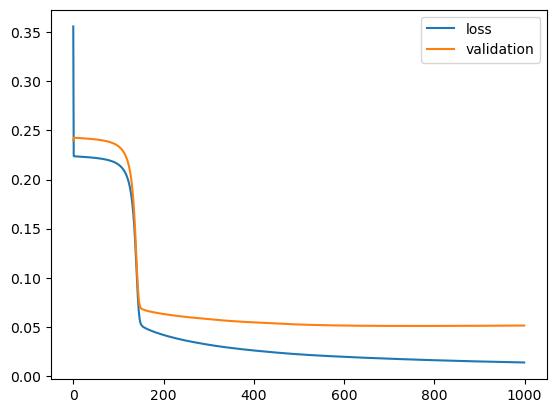

In [361]:
#batch


scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 1000
learn_rate = .0008
batch_size = 80
val_split = .2
verbose = 1

layer_structure = [X_train.shape[1],10,20,10,5,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.5340697128058809 Valid MSE: 0.2544031650932886
Epoch: 1 Train MSE: 0.22568183704862183 Valid MSE: 0.2441168429554302
Epoch: 2 Train MSE: 0.19871697051801832 Valid MSE: 0.2525785074683642
Epoch: 3 Train MSE: 0.19754999665947334 Valid MSE: 0.25470910806922614
Epoch: 4 Train MSE: 0.19752414644614927 Valid MSE: 0.25511928198304923
Epoch: 5 Train MSE: 0.1975196766605884 Valid MSE: 0.2551885017844495
Epoch: 6 Train MSE: 0.19751195615994435 Valid MSE: 0.2551935000461849
Epoch: 7 Train MSE: 0.19750336679830893 Valid MSE: 0.2551864995801926
Epoch: 8 Train MSE: 0.19749459604297134 Valid MSE: 0.2551772497633666
Epoch: 9 Train MSE: 0.1974857789217355 Valid MSE: 0.2551675664443249
Epoch: 10 Train MSE: 0.19747693934442717 Valid MSE: 0.2551577864675349
Epoch: 11 Train MSE: 0.1974680802283412 Valid MSE: 0.25514797093865405
Epoch: 12 Train MSE: 0.19745920056115504 Valid MSE: 0.2551381295282359
Epoch: 13 Train MSE: 0.1974502985895223 Valid MSE: 0.2551282623001507
Epoch: 14 Train MS

Epoch: 271 Train MSE: 0.04680890207189935 Valid MSE: 0.06829801965814282
Epoch: 272 Train MSE: 0.04660403466828233 Valid MSE: 0.0681860269940658
Epoch: 273 Train MSE: 0.046400792736529806 Valid MSE: 0.06807454244623773
Epoch: 274 Train MSE: 0.046198127838303654 Valid MSE: 0.06796311852933853
Epoch: 275 Train MSE: 0.04599382948170886 Valid MSE: 0.06785159024908605
Epoch: 276 Train MSE: 0.045791022311942015 Valid MSE: 0.06774062459252343
Epoch: 277 Train MSE: 0.04558907014041899 Valid MSE: 0.06763044117622122
Epoch: 278 Train MSE: 0.04538465289061076 Valid MSE: 0.06752004285396754
Epoch: 279 Train MSE: 0.045178258284147677 Valid MSE: 0.06741041617250938
Epoch: 280 Train MSE: 0.0449719444909301 Valid MSE: 0.06730125376510918
Epoch: 281 Train MSE: 0.04476519332451519 Valid MSE: 0.0671934984517022
Epoch: 282 Train MSE: 0.044558311137426775 Valid MSE: 0.06708739881416383
Epoch: 283 Train MSE: 0.044352577641596676 Valid MSE: 0.06698025371263576
Epoch: 284 Train MSE: 0.044148275392108714 Valid

Epoch: 540 Train MSE: 0.023588085844843548 Valid MSE: 0.05729955454271165
Epoch: 541 Train MSE: 0.02353636801270239 Valid MSE: 0.05728134983519916
Epoch: 542 Train MSE: 0.023483353696458896 Valid MSE: 0.05725459258011542
Epoch: 543 Train MSE: 0.023431164564986402 Valid MSE: 0.057230155591931446
Epoch: 544 Train MSE: 0.023380030052916657 Valid MSE: 0.05720453381293089
Epoch: 545 Train MSE: 0.02332805806365393 Valid MSE: 0.05717628497948555
Epoch: 546 Train MSE: 0.02327657931961287 Valid MSE: 0.05715086865171922
Epoch: 547 Train MSE: 0.0232245473274243 Valid MSE: 0.057126703266308636
Epoch: 548 Train MSE: 0.023172910522017004 Valid MSE: 0.05710107817103963
Epoch: 549 Train MSE: 0.02312123261105319 Valid MSE: 0.05707052912890804
Epoch: 550 Train MSE: 0.023069781923895902 Valid MSE: 0.05704461877384269
Epoch: 551 Train MSE: 0.02301850409531262 Valid MSE: 0.05701731245674027
Epoch: 552 Train MSE: 0.022966871508304308 Valid MSE: 0.05698868445882244
Epoch: 553 Train MSE: 0.022915494696472437 

Epoch: 798 Train MSE: 0.010463375237042178 Valid MSE: 0.05188792003500445
Epoch: 799 Train MSE: 0.01042430693191763 Valid MSE: 0.0518790745229798
Epoch: 800 Train MSE: 0.010385275399227244 Valid MSE: 0.05187032576784882
Epoch: 801 Train MSE: 0.010346279480716791 Valid MSE: 0.05186167610220859
Epoch: 802 Train MSE: 0.010307471590052665 Valid MSE: 0.051851046943917414
Epoch: 803 Train MSE: 0.01026855982748203 Valid MSE: 0.051842681373365444
Epoch: 804 Train MSE: 0.010229746916066807 Valid MSE: 0.051832016980548526
Epoch: 805 Train MSE: 0.010190981234270844 Valid MSE: 0.05182418001778066
Epoch: 806 Train MSE: 0.010152207056306201 Valid MSE: 0.051813727887298704
Epoch: 807 Train MSE: 0.010113502673399445 Valid MSE: 0.05180615438390722
Epoch: 808 Train MSE: 0.010074799229477805 Valid MSE: 0.051795903598560206
Epoch: 809 Train MSE: 0.010036127673965615 Valid MSE: 0.0517885973193466
Epoch: 810 Train MSE: 0.00999754303369756 Valid MSE: 0.05177884041008153
Epoch: 811 Train MSE: 0.00995886339166

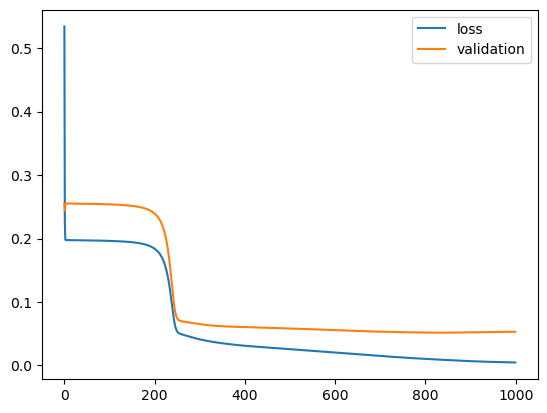

In [366]:
#batch


scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 1000
learn_rate = .0008
batch_size = 60
val_split = .2
verbose = 1

layer_structure = [X_train.shape[1],10,20,10,5,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.5329350717294854 Valid MSE: 0.2823738243638912
Epoch: 1 Train MSE: 0.2593545569084474 Valid MSE: 0.23917647127947272
Epoch: 2 Train MSE: 0.20735268701797713 Valid MSE: 0.24608589598967737
Epoch: 3 Train MSE: 0.20107123288649378 Valid MSE: 0.2510935524078117
Epoch: 4 Train MSE: 0.20052028221214685 Valid MSE: 0.2528503182398981
Epoch: 5 Train MSE: 0.20048555643816177 Valid MSE: 0.2533829753876226
Epoch: 6 Train MSE: 0.20048366438879262 Valid MSE: 0.25353600293334233
Epoch: 7 Train MSE: 0.2004809187690587 Valid MSE: 0.25357701626504475
Epoch: 8 Train MSE: 0.2004770529472839 Valid MSE: 0.25358544321974524
Epoch: 9 Train MSE: 0.20047279827392098 Valid MSE: 0.25358443455795904
Epoch: 10 Train MSE: 0.20046843392049407 Valid MSE: 0.2535807027649183
Epoch: 11 Train MSE: 0.2004640458077764 Valid MSE: 0.2535761907626733
Epoch: 12 Train MSE: 0.2004596587045196 Valid MSE: 0.2535714602475072
Epoch: 13 Train MSE: 0.20045527924835618 Valid MSE: 0.25356667314858095
Epoch: 14 Train

Epoch: 283 Train MSE: 0.17297255521340738 Valid MSE: 0.221109381868351
Epoch: 284 Train MSE: 0.17145928919160325 Valid MSE: 0.21925925646157257
Epoch: 285 Train MSE: 0.16982400343959814 Valid MSE: 0.2172551025922279
Epoch: 286 Train MSE: 0.1680543857289779 Valid MSE: 0.2150850626831041
Epoch: 287 Train MSE: 0.16613681134771746 Valid MSE: 0.21273001581540169
Epoch: 288 Train MSE: 0.16405625081239783 Valid MSE: 0.21016869872468485
Epoch: 289 Train MSE: 0.16179619968129086 Valid MSE: 0.2073819797428969
Epoch: 290 Train MSE: 0.1593386480447313 Valid MSE: 0.20436960253405823
Epoch: 291 Train MSE: 0.1566641150429772 Valid MSE: 0.20109901412854458
Epoch: 292 Train MSE: 0.1537666981986379 Valid MSE: 0.19755188729023843
Epoch: 293 Train MSE: 0.1506417614133239 Valid MSE: 0.19369666952665163
Epoch: 294 Train MSE: 0.14725910532257178 Valid MSE: 0.18949697716063008
Epoch: 295 Train MSE: 0.14358348928879267 Valid MSE: 0.18492702094778166
Epoch: 296 Train MSE: 0.13959517742314176 Valid MSE: 0.179963

Epoch: 564 Train MSE: 0.026762927095754473 Valid MSE: 0.055633386792892474
Epoch: 565 Train MSE: 0.02671552151040275 Valid MSE: 0.05561105611279787
Epoch: 566 Train MSE: 0.026668366121212515 Valid MSE: 0.055588895532950065
Epoch: 567 Train MSE: 0.026621451603419354 Valid MSE: 0.05556690939438966
Epoch: 568 Train MSE: 0.02657392360624573 Valid MSE: 0.055537926968271145
Epoch: 569 Train MSE: 0.026528843142737263 Valid MSE: 0.05552204135824142
Epoch: 570 Train MSE: 0.026482170430133553 Valid MSE: 0.05550083658844396
Epoch: 571 Train MSE: 0.026436204449228968 Valid MSE: 0.05547927138290851
Epoch: 572 Train MSE: 0.026390486393423902 Valid MSE: 0.05545773288750468
Epoch: 573 Train MSE: 0.026345007139451586 Valid MSE: 0.05543634982880108
Epoch: 574 Train MSE: 0.02629891485422515 Valid MSE: 0.05540806051153327
Epoch: 575 Train MSE: 0.026255267613769444 Valid MSE: 0.05539273094675176
Epoch: 576 Train MSE: 0.026210033239514915 Valid MSE: 0.05537210220235268
Epoch: 577 Train MSE: 0.02616550289326

Epoch: 840 Train MSE: 0.01958938562564691 Valid MSE: 0.052818225488445725
Epoch: 841 Train MSE: 0.019572983899245302 Valid MSE: 0.05281137694932288
Epoch: 842 Train MSE: 0.019556620837106672 Valid MSE: 0.052804524752806
Epoch: 843 Train MSE: 0.019540295896675178 Valid MSE: 0.052797672752572355
Epoch: 844 Train MSE: 0.019524008633959214 Valid MSE: 0.05279082438790283
Epoch: 845 Train MSE: 0.019507853104348223 Valid MSE: 0.05278474746858295
Epoch: 846 Train MSE: 0.019491599884608662 Valid MSE: 0.05277802382490373
Epoch: 847 Train MSE: 0.019475434731627994 Valid MSE: 0.0527712960007382
Epoch: 848 Train MSE: 0.01945930697802654 Valid MSE: 0.052764573379532664
Epoch: 849 Train MSE: 0.019443226652710376 Valid MSE: 0.05275798934663328
Epoch: 850 Train MSE: 0.019427180866324115 Valid MSE: 0.052751350558796276
Epoch: 851 Train MSE: 0.019411181528664924 Valid MSE: 0.05275292629828743
Epoch: 852 Train MSE: 0.019394633653324996 Valid MSE: 0.0527465603238678
Epoch: 853 Train MSE: 0.0193787381738170

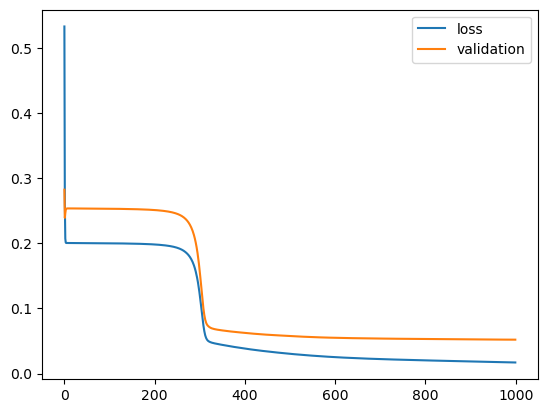

In [370]:
#batch


scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 1000
learn_rate = .0008
batch_size = 55
val_split = .2
verbose = 1

layer_structure = [X_train.shape[1],10,20,10,5,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

# val_split

Epoch: 0 Train MSE: 0.43018912076829374 Valid MSE: 0.24007261721841391
Epoch: 1 Train MSE: 0.2434539455439329 Valid MSE: 0.23589090692805392
Epoch: 2 Train MSE: 0.24299186878412365 Valid MSE: 0.23578827537283026
Epoch: 3 Train MSE: 0.24297050034964432 Valid MSE: 0.23576760342019656
Epoch: 4 Train MSE: 0.2429521497592601 Valid MSE: 0.23574896975580267
Epoch: 5 Train MSE: 0.2429337451703835 Valid MSE: 0.23573025666660616
Epoch: 6 Train MSE: 0.24291520049064935 Valid MSE: 0.2357113969366482
Epoch: 7 Train MSE: 0.24289650249946396 Valid MSE: 0.23569237765123288
Epoch: 8 Train MSE: 0.24287763970780518 Valid MSE: 0.23567318712759225
Epoch: 9 Train MSE: 0.24285860045526428 Valid MSE: 0.23565381348945824
Epoch: 10 Train MSE: 0.24283937284303742 Valid MSE: 0.23563424461242108
Epoch: 11 Train MSE: 0.24281994471508112 Valid MSE: 0.2356144681050273
Epoch: 12 Train MSE: 0.24280030363990351 Valid MSE: 0.23559447129015534
Epoch: 13 Train MSE: 0.24278043689167803 Valid MSE: 0.23557424118567696
Epoch: 

Epoch: 262 Train MSE: 0.07229345057150142 Valid MSE: 0.050962710265571955
Epoch: 263 Train MSE: 0.07220015756363597 Valid MSE: 0.05086754241707919
Epoch: 264 Train MSE: 0.07210977580080861 Valid MSE: 0.05077786200916366
Epoch: 265 Train MSE: 0.07202153160571265 Valid MSE: 0.05068986416486709
Epoch: 266 Train MSE: 0.07193372650933841 Valid MSE: 0.05060306585030236
Epoch: 267 Train MSE: 0.07184636519794226 Valid MSE: 0.050517316544573296
Epoch: 268 Train MSE: 0.07175943502927831 Valid MSE: 0.050432609734859885
Epoch: 269 Train MSE: 0.07167292917438826 Valid MSE: 0.05034845736928048
Epoch: 270 Train MSE: 0.07158792778395673 Valid MSE: 0.0502706639477421
Epoch: 271 Train MSE: 0.07150414558540422 Valid MSE: 0.05019343526539969
Epoch: 272 Train MSE: 0.07142136623163675 Valid MSE: 0.05011852270450735
Epoch: 273 Train MSE: 0.07134049470698675 Valid MSE: 0.05004818636145355
Epoch: 274 Train MSE: 0.07126007585231225 Valid MSE: 0.04997660467534336
Epoch: 275 Train MSE: 0.07118009312043548 Valid M

Epoch: 519 Train MSE: 0.05988547999623746 Valid MSE: 0.04115834394668828
Epoch: 520 Train MSE: 0.0598516279681595 Valid MSE: 0.04113256650306697
Epoch: 521 Train MSE: 0.05981780485586551 Valid MSE: 0.0411068593616616
Epoch: 522 Train MSE: 0.05978401073970239 Valid MSE: 0.04108122257033083
Epoch: 523 Train MSE: 0.05975024570409635 Valid MSE: 0.04105565840739382
Epoch: 524 Train MSE: 0.05971650983747631 Valid MSE: 0.04103029769131565
Epoch: 525 Train MSE: 0.05968280323219795 Valid MSE: 0.04100500982753942
Epoch: 526 Train MSE: 0.05964912598446821 Valid MSE: 0.04097979111593673
Epoch: 527 Train MSE: 0.05961547819427085 Valid MSE: 0.040954669685833535
Epoch: 528 Train MSE: 0.059581859965292354 Valid MSE: 0.040929681555904776
Epoch: 529 Train MSE: 0.059548271404848835 Valid MSE: 0.04090476192622617
Epoch: 530 Train MSE: 0.05951471262381376 Valid MSE: 0.040879910882559815
Epoch: 531 Train MSE: 0.05948118373654621 Valid MSE: 0.040855128513572744
Epoch: 532 Train MSE: 0.059447684860820374 Vali

Epoch: 762 Train MSE: 0.05298215169938329 Valid MSE: 0.03714296978728209
Epoch: 763 Train MSE: 0.05296097282637247 Valid MSE: 0.03713492906126902
Epoch: 764 Train MSE: 0.05293986532689023 Valid MSE: 0.037127024220143995
Epoch: 765 Train MSE: 0.05291882907791154 Valid MSE: 0.037119244359555395
Epoch: 766 Train MSE: 0.052897864000120955 Valid MSE: 0.037111578268605665
Epoch: 767 Train MSE: 0.05287697005500179 Valid MSE: 0.03710401696844726
Epoch: 768 Train MSE: 0.052856147224516266 Valid MSE: 0.03709655332863402
Epoch: 769 Train MSE: 0.052835395499540284 Valid MSE: 0.03708918159688397
Epoch: 770 Train MSE: 0.05281471487441606 Valid MSE: 0.037081897076376324
Epoch: 771 Train MSE: 0.05279410534442944 Valid MSE: 0.037074695903674675
Epoch: 772 Train MSE: 0.052773566904593595 Valid MSE: 0.03706757488545253
Epoch: 773 Train MSE: 0.052753099549026114 Valid MSE: 0.03706053137207623
Epoch: 774 Train MSE: 0.05273270327061104 Valid MSE: 0.03705356315680231
Epoch: 775 Train MSE: 0.05271237806080667

Test error:  0.025097304005857288


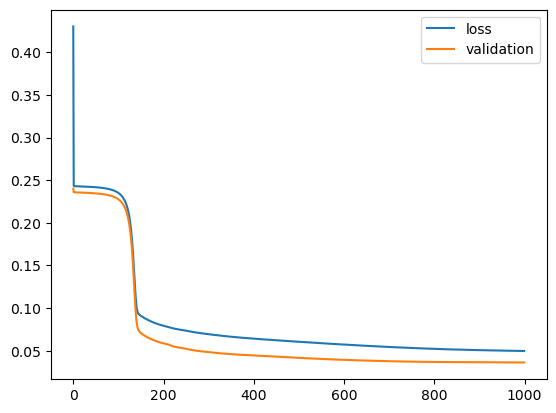

In [374]:
#split


scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 1000
learn_rate = .0008
batch_size = 100
val_split = .5
verbose = 1

layer_structure = [X_train.shape[1],10,20,10,5,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.4293389898864911 Valid MSE: 0.27821091856436314
Epoch: 1 Train MSE: 0.2549139464646078 Valid MSE: 0.24241124445961096
Epoch: 2 Train MSE: 0.24693960936172285 Valid MSE: 0.23948001617577797
Epoch: 3 Train MSE: 0.2467261905589883 Valid MSE: 0.2391339068357962
Epoch: 4 Train MSE: 0.24670471938170913 Valid MSE: 0.2390785869403572
Epoch: 5 Train MSE: 0.24669075205228777 Valid MSE: 0.23905948132873445
Epoch: 6 Train MSE: 0.2466774508610468 Valid MSE: 0.23904494619656735
Epoch: 7 Train MSE: 0.2466642189421689 Valid MSE: 0.23903097323622913
Epoch: 8 Train MSE: 0.24665097824380183 Valid MSE: 0.23901704692929843
Epoch: 9 Train MSE: 0.24663771204871132 Valid MSE: 0.2390030946119515
Epoch: 10 Train MSE: 0.24662441131881602 Valid MSE: 0.23898909980291633
Epoch: 11 Train MSE: 0.24661106795221635 Valid MSE: 0.23897505311382444
Epoch: 12 Train MSE: 0.24659767391923315 Valid MSE: 0.23896094600280596
Epoch: 13 Train MSE: 0.24658422114317993 Valid MSE: 0.2389467699702573
Epoch: 14 T

Epoch: 265 Train MSE: 0.05710302140731856 Valid MSE: 0.04913775693970451
Epoch: 266 Train MSE: 0.057058757801891 Valid MSE: 0.04908022292241325
Epoch: 267 Train MSE: 0.057015002887531294 Valid MSE: 0.049023629007560694
Epoch: 268 Train MSE: 0.05697167523899601 Valid MSE: 0.048967819383905715
Epoch: 269 Train MSE: 0.056928769356641915 Valid MSE: 0.04891254399394115
Epoch: 270 Train MSE: 0.05688627993466525 Valid MSE: 0.04885778798521246
Epoch: 271 Train MSE: 0.05684420184606824 Valid MSE: 0.04880354139778432
Epoch: 272 Train MSE: 0.05680253013155818 Valid MSE: 0.0487497955041367
Epoch: 273 Train MSE: 0.05676125998970671 Valid MSE: 0.04869675274100395
Epoch: 274 Train MSE: 0.05672038676803058 Valid MSE: 0.04864427202162175
Epoch: 275 Train MSE: 0.05667990595477264 Valid MSE: 0.04859226378400116
Epoch: 276 Train MSE: 0.05663981292288505 Valid MSE: 0.0485407203469534
Epoch: 277 Train MSE: 0.056600104268140494 Valid MSE: 0.04848963927062154
Epoch: 278 Train MSE: 0.05656077519217572 Valid MS

Epoch: 509 Train MSE: 0.04751374582948735 Valid MSE: 0.04126006580015423
Epoch: 510 Train MSE: 0.04749116267735958 Valid MSE: 0.04124516420620748
Epoch: 511 Train MSE: 0.04746866330778086 Valid MSE: 0.04123032844234686
Epoch: 512 Train MSE: 0.04744624729263296 Valid MSE: 0.041215558163695924
Epoch: 513 Train MSE: 0.0474239142050564 Valid MSE: 0.041200853026444814
Epoch: 514 Train MSE: 0.04740166360908972 Valid MSE: 0.04118621104423481
Epoch: 515 Train MSE: 0.04737949522704467 Valid MSE: 0.04117163401844131
Epoch: 516 Train MSE: 0.04735740848352606 Valid MSE: 0.04115712151884465
Epoch: 517 Train MSE: 0.04733540295743975 Valid MSE: 0.041142674263546605
Epoch: 518 Train MSE: 0.047313478228940595 Valid MSE: 0.04112829661853396
Epoch: 519 Train MSE: 0.04729163387951553 Valid MSE: 0.04111398206270249
Epoch: 520 Train MSE: 0.04726986949200254 Valid MSE: 0.041099730221036065
Epoch: 521 Train MSE: 0.04724818465060837 Valid MSE: 0.0410855407268432
Epoch: 522 Train MSE: 0.04722657894092551 Valid 

Epoch: 760 Train MSE: 0.043605701444982395 Valid MSE: 0.0388528168810054
Epoch: 761 Train MSE: 0.04359465367944965 Valid MSE: 0.038846598906807535
Epoch: 762 Train MSE: 0.04358362639045877 Valid MSE: 0.03884049618512108
Epoch: 763 Train MSE: 0.04357262448973322 Valid MSE: 0.03883430534995892
Epoch: 764 Train MSE: 0.043561642922671964 Valid MSE: 0.03882814049483994
Epoch: 765 Train MSE: 0.04355068156051379 Valid MSE: 0.03882208850471716
Epoch: 766 Train MSE: 0.04353974525485412 Valid MSE: 0.03881595097071027
Epoch: 767 Train MSE: 0.04352882902675233 Valid MSE: 0.038809839250311985
Epoch: 768 Train MSE: 0.04351793278112966 Valid MSE: 0.0388038380020779
Epoch: 769 Train MSE: 0.04350706118317315 Valid MSE: 0.03879775366604514
Epoch: 770 Train MSE: 0.043496207490144274 Valid MSE: 0.0387917806946422
Epoch: 771 Train MSE: 0.04348537910254443 Valid MSE: 0.03878572753567283
Epoch: 772 Train MSE: 0.043474569925078636 Valid MSE: 0.03877970057535014
Epoch: 773 Train MSE: 0.04346377994196348 Valid 

Epoch: 997 Train MSE: 0.04147686193917868 Valid MSE: 0.03783405001058847
Epoch: 998 Train MSE: 0.04146965705244027 Valid MSE: 0.03783149481140617
Epoch: 999 Train MSE: 0.04146246574307652 Valid MSE: 0.037828958372801195
Test error:  0.021076586695994985


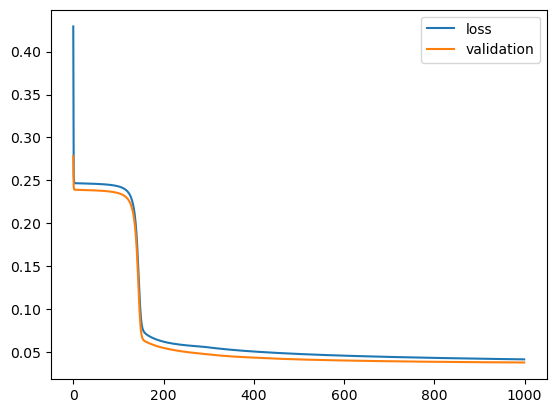

In [379]:
#split


scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 1000
learn_rate = .0008
batch_size = 100
val_split = .4
verbose = 1

layer_structure = [X_train.shape[1],10,20,10,5,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.27101291011078255 Valid MSE: 0.2274796491005324
Epoch: 1 Train MSE: 0.22806312752150498 Valid MSE: 0.22732276488442069
Epoch: 2 Train MSE: 0.2280191397652986 Valid MSE: 0.22730778861573828
Epoch: 3 Train MSE: 0.22800403553347953 Valid MSE: 0.22729379649911804
Epoch: 4 Train MSE: 0.22798915681120802 Valid MSE: 0.22728001299825204
Epoch: 5 Train MSE: 0.2279744859694115 Valid MSE: 0.22726641763881283
Epoch: 6 Train MSE: 0.22796001496958723 Valid MSE: 0.22725300281575705
Epoch: 7 Train MSE: 0.2279457359921215 Valid MSE: 0.22723976133371107
Epoch: 8 Train MSE: 0.2279316414154594 Valid MSE: 0.22722668617970002
Epoch: 9 Train MSE: 0.22791772380625577 Valid MSE: 0.22721377051047695
Epoch: 10 Train MSE: 0.2279039759100473 Valid MSE: 0.2272010076439609
Epoch: 11 Train MSE: 0.22789039064228805 Valid MSE: 0.22718839105106473
Epoch: 12 Train MSE: 0.22787696107972563 Valid MSE: 0.22717591434782905
Epoch: 13 Train MSE: 0.22786368045209632 Valid MSE: 0.22716357128784193
Epoch: 14

Epoch: 245 Train MSE: 0.058673713481994336 Valid MSE: 0.05187243426694314
Epoch: 246 Train MSE: 0.058584723348242114 Valid MSE: 0.05175733490672507
Epoch: 247 Train MSE: 0.05849860469918249 Valid MSE: 0.05164886446007543
Epoch: 248 Train MSE: 0.05841260952945029 Valid MSE: 0.0515533716342542
Epoch: 249 Train MSE: 0.0583214964085448 Valid MSE: 0.05142364649200193
Epoch: 250 Train MSE: 0.058229565717472107 Valid MSE: 0.05130352228494752
Epoch: 251 Train MSE: 0.05813401865079815 Valid MSE: 0.05120497293936108
Epoch: 252 Train MSE: 0.058040609067469315 Valid MSE: 0.051082104936110435
Epoch: 253 Train MSE: 0.05794871238528257 Valid MSE: 0.050960581992351164
Epoch: 254 Train MSE: 0.05785830239011644 Valid MSE: 0.05084587048609931
Epoch: 255 Train MSE: 0.05777020616581671 Valid MSE: 0.05075957063082765
Epoch: 256 Train MSE: 0.05768267033318119 Valid MSE: 0.05064324540006784
Epoch: 257 Train MSE: 0.05759825859010479 Valid MSE: 0.050503506522471556
Epoch: 258 Train MSE: 0.05751502227367693 Vali

Epoch: 481 Train MSE: 0.04783662338623733 Valid MSE: 0.0364026582904338
Epoch: 482 Train MSE: 0.047812936360142486 Valid MSE: 0.036366064609266294
Epoch: 483 Train MSE: 0.04778932355510045 Valid MSE: 0.036329615651262664
Epoch: 484 Train MSE: 0.04776578437303159 Valid MSE: 0.036293310182376415
Epoch: 485 Train MSE: 0.04774231822078717 Valid MSE: 0.03625714705276824
Epoch: 486 Train MSE: 0.04771892450989548 Valid MSE: 0.03622112518474573
Epoch: 487 Train MSE: 0.04769565042346471 Valid MSE: 0.03618555920622407
Epoch: 488 Train MSE: 0.047672728367202856 Valid MSE: 0.03615043914350831
Epoch: 489 Train MSE: 0.047649917639349594 Valid MSE: 0.036115412982916054
Epoch: 490 Train MSE: 0.047627170778640704 Valid MSE: 0.03608048620538677
Epoch: 491 Train MSE: 0.04760448725381653 Valid MSE: 0.03604565652565156
Epoch: 492 Train MSE: 0.0475818665417749 Valid MSE: 0.03601090645572436
Epoch: 493 Train MSE: 0.047559308125468075 Valid MSE: 0.0359762657487897
Epoch: 494 Train MSE: 0.04753681149288521 Val

Epoch: 727 Train MSE: 0.04250747732364348 Valid MSE: 0.029449927350895234
Epoch: 728 Train MSE: 0.04248387905608503 Valid MSE: 0.029424677476639172
Epoch: 729 Train MSE: 0.04246030348341174 Valid MSE: 0.029399480013112593
Epoch: 730 Train MSE: 0.04243675030833335 Valid MSE: 0.02937433467784915
Epoch: 731 Train MSE: 0.04241321923474399 Valid MSE: 0.02934924118818774
Epoch: 732 Train MSE: 0.04238970996773124 Valid MSE: 0.029324199261578764
Epoch: 733 Train MSE: 0.042366222213585665 Valid MSE: 0.02929920861582367
Epoch: 734 Train MSE: 0.04234275567981086 Valid MSE: 0.029274330326717335
Epoch: 735 Train MSE: 0.042319310075133794 Valid MSE: 0.029249575741587975
Epoch: 736 Train MSE: 0.04229588510951563 Valid MSE: 0.029224866083260533
Epoch: 737 Train MSE: 0.04227248049416281 Valid MSE: 0.02920020111110939
Epoch: 738 Train MSE: 0.04224909594153859 Valid MSE: 0.02917558058542604
Epoch: 739 Train MSE: 0.04222573116537473 Valid MSE: 0.02915100426746854
Epoch: 740 Train MSE: 0.04220238588068366 

Epoch: 980 Train MSE: 0.03663697485130512 Valid MSE: 0.02398272386047598
Epoch: 981 Train MSE: 0.036614579779436905 Valid MSE: 0.023965040797981202
Epoch: 982 Train MSE: 0.036592212478451194 Valid MSE: 0.023947474551871205
Epoch: 983 Train MSE: 0.03656989099294061 Valid MSE: 0.02392977045111887
Epoch: 984 Train MSE: 0.036547599650948316 Valid MSE: 0.02391230331385605
Epoch: 985 Train MSE: 0.036525351476698206 Valid MSE: 0.02389470536584605
Epoch: 986 Train MSE: 0.03650313400507865 Valid MSE: 0.023877346960974665
Epoch: 987 Train MSE: 0.03648096061889777 Valid MSE: 0.023859853408446145
Epoch: 988 Train MSE: 0.03645881895733142 Valid MSE: 0.023842601798600566
Epoch: 989 Train MSE: 0.03643672225932874 Valid MSE: 0.02382521115669553
Epoch: 990 Train MSE: 0.03641465838368392 Valid MSE: 0.023808065589656868
Epoch: 991 Train MSE: 0.03639263205285584 Valid MSE: 0.023790855646098952
Epoch: 992 Train MSE: 0.03637065858483596 Valid MSE: 0.02377361142934974
Epoch: 993 Train MSE: 0.0363487154609151

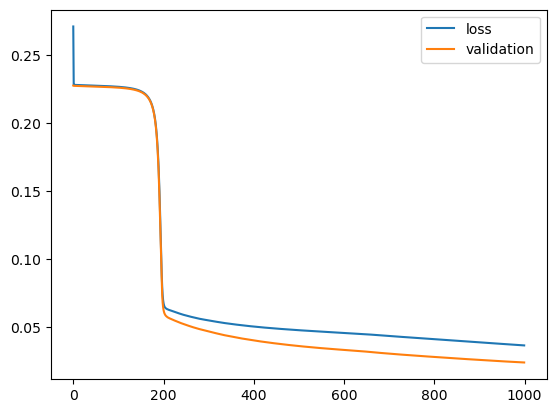

In [383]:
#split


scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 1000
learn_rate = .0008
batch_size = 100
val_split = .1
verbose = 1

layer_structure = [X_train.shape[1],10,20,10,5,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

# Layers

Epoch: 0 Train MSE: 0.49006387441823995 Valid MSE: 0.2259551156196163
Epoch: 1 Train MSE: 0.2258086219717959 Valid MSE: 0.22361741090658496
Epoch: 2 Train MSE: 0.22360988696810466 Valid MSE: 0.22168973273745896
Epoch: 3 Train MSE: 0.22156433884611923 Valid MSE: 0.21971479351024592
Epoch: 4 Train MSE: 0.21946199546129844 Valid MSE: 0.21766232331788937
Epoch: 5 Train MSE: 0.21727235770737696 Valid MSE: 0.21550333764246468
Epoch: 6 Train MSE: 0.21496498946148546 Valid MSE: 0.21320819753895312
Epoch: 7 Train MSE: 0.21250877768634024 Valid MSE: 0.2107460705394115
Epoch: 8 Train MSE: 0.20987143539482805 Valid MSE: 0.20808448713325997
Epoch: 9 Train MSE: 0.20701910570261353 Valid MSE: 0.20518899065753238
Epoch: 10 Train MSE: 0.2039160890959016 Valid MSE: 0.2020229156204824
Epoch: 11 Train MSE: 0.20052474115625196 Valid MSE: 0.1985473559387562
Epoch: 12 Train MSE: 0.1968056181513042 Valid MSE: 0.19472141877735324
Epoch: 13 Train MSE: 0.1927179863330909 Valid MSE: 0.1905029031887368
Epoch: 14 T

Epoch: 689 Train MSE: 0.043608630394968775 Valid MSE: 0.030276831449901814
Epoch: 690 Train MSE: 0.04359771837419736 Valid MSE: 0.030263647853049556
Epoch: 691 Train MSE: 0.0435868093586665 Valid MSE: 0.030250484145600994
Epoch: 692 Train MSE: 0.0435759032924798 Valid MSE: 0.030237340248022087
Epoch: 693 Train MSE: 0.043564998701698665 Valid MSE: 0.030224238772570296
Epoch: 694 Train MSE: 0.043554088799136 Valid MSE: 0.03021114364231044
Epoch: 695 Train MSE: 0.04354318023549697 Valid MSE: 0.03019806379673991
Epoch: 696 Train MSE: 0.0435322745188536 Valid MSE: 0.030185000187554302
Epoch: 697 Train MSE: 0.04352137158869524 Valid MSE: 0.030171953158593754
Epoch: 698 Train MSE: 0.0435104713888024 Valid MSE: 0.03015892299946592
Epoch: 699 Train MSE: 0.043499573863325265 Valid MSE: 0.030145909953105485
Epoch: 700 Train MSE: 0.043488678956749474 Valid MSE: 0.030132914221853487
Epoch: 701 Train MSE: 0.04347778661387255 Valid MSE: 0.030119935972744684
Epoch: 702 Train MSE: 0.043466896779785796 

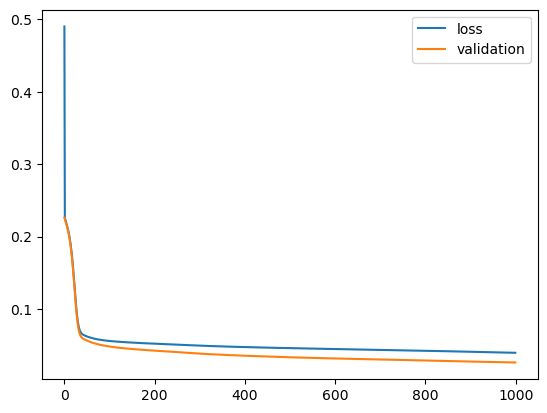

In [387]:
#split


scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 1000
learn_rate = .00095
batch_size = 100
val_split = .1
verbose = 1

layer_structure = [X_train.shape[1],8,8,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))

Epoch: 0 Train MSE: 0.4446742668420496 Valid MSE: 0.2258842685598689
Epoch: 1 Train MSE: 0.22629833915878267 Valid MSE: 0.22558983669840552
Epoch: 2 Train MSE: 0.2261588698320056 Valid MSE: 0.22550793872040154
Epoch: 3 Train MSE: 0.22607109162705763 Valid MSE: 0.22542219425731483
Epoch: 4 Train MSE: 0.22597843695749475 Valid MSE: 0.22533158991161945
Epoch: 5 Train MSE: 0.22588048312904419 Valid MSE: 0.22523570495470946
Epoch: 6 Train MSE: 0.2257767779002338 Valid MSE: 0.22513408733324222
Epoch: 7 Train MSE: 0.225666871113532 Valid MSE: 0.225026343720281
Epoch: 8 Train MSE: 0.22555043127221341 Valid MSE: 0.22491191846590258
Epoch: 9 Train MSE: 0.22542671313456594 Valid MSE: 0.2247901789923114
Epoch: 10 Train MSE: 0.2252950499822408 Valid MSE: 0.22466047779637421
Epoch: 11 Train MSE: 0.22515473611846423 Valid MSE: 0.22452210132937425
Epoch: 12 Train MSE: 0.22500499350154454 Valid MSE: 0.22437426164504712
Epoch: 13 Train MSE: 0.2248449625614881 Valid MSE: 0.22421608681716956
Epoch: 14 Tra

Epoch: 423 Train MSE: 0.03420348597729814 Valid MSE: 0.031224585032827233
Epoch: 424 Train MSE: 0.03418897467894471 Valid MSE: 0.03121915098066308
Epoch: 425 Train MSE: 0.03417449435078486 Valid MSE: 0.03121225909079588
Epoch: 426 Train MSE: 0.03416005040959595 Valid MSE: 0.031205429459202398
Epoch: 427 Train MSE: 0.03414567452068721 Valid MSE: 0.03119869125620283
Epoch: 428 Train MSE: 0.03413137728413601 Valid MSE: 0.031191755683515558
Epoch: 429 Train MSE: 0.034117151037285964 Valid MSE: 0.03118551349715256
Epoch: 430 Train MSE: 0.0341033550108187 Valid MSE: 0.031176384985402813
Epoch: 431 Train MSE: 0.03409003066078823 Valid MSE: 0.0311533455728952
Epoch: 432 Train MSE: 0.034076419850256875 Valid MSE: 0.031146163884536896
Epoch: 433 Train MSE: 0.034063226450339476 Valid MSE: 0.031138248046167456
Epoch: 434 Train MSE: 0.034049581028795656 Valid MSE: 0.0311441091425207
Epoch: 435 Train MSE: 0.03403648662474806 Valid MSE: 0.031137495269806432
Epoch: 436 Train MSE: 0.034023198156724284 

Epoch: 854 Train MSE: 0.028577243902072624 Valid MSE: 0.025101878671536185
Epoch: 855 Train MSE: 0.028563173795182292 Valid MSE: 0.025076584205408346
Epoch: 856 Train MSE: 0.028549107650992354 Valid MSE: 0.02505204452739742
Epoch: 857 Train MSE: 0.02853504547055468 Valid MSE: 0.025020073479021444
Epoch: 858 Train MSE: 0.02852100724134508 Valid MSE: 0.02499698411272364
Epoch: 859 Train MSE: 0.028506949722725564 Valid MSE: 0.02497495834130628
Epoch: 860 Train MSE: 0.02849286172169259 Valid MSE: 0.02495368466389276
Epoch: 861 Train MSE: 0.028478776404831208 Valid MSE: 0.024920493348358046
Epoch: 862 Train MSE: 0.028464690173780928 Valid MSE: 0.024892694125452287
Epoch: 863 Train MSE: 0.028450598337226365 Valid MSE: 0.02487374373955902
Epoch: 864 Train MSE: 0.028436511530864975 Valid MSE: 0.024843218283913872
Epoch: 865 Train MSE: 0.02842245676741759 Valid MSE: 0.02481777721252539
Epoch: 866 Train MSE: 0.028408369723162363 Valid MSE: 0.024796333966819326
Epoch: 867 Train MSE: 0.02839432498

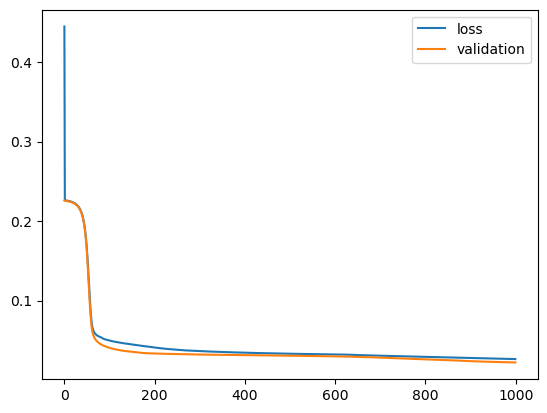

In [391]:
#split


scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

epocs = 1000
learn_rate = .00095
batch_size = 100
val_split = .1
verbose = 1

layer_structure = [X_train.shape[1],8,8,8,1]
nn = Neural(layer_structure, epocs, learn_rate, batch_size, val_split, verbose)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))